In [1274]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings("ignore")

In [1275]:
data = pd.read_excel('leads_data.xlsx')

In [1276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30773 entries, 0 to 30772
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   LeadId                    30773 non-null  int64         
 1   VisitorId                 30773 non-null  object        
 2   BornDate                  30773 non-null  datetime64[ns]
 3   BornDateTime              30773 non-null  datetime64[ns]
 4   Project                   30773 non-null  object        
 5   Stage                     30773 non-null  object        
 6   CountOfClickEvents        30773 non-null  int64         
 7   WebTimeSpent (seconds)    30773 non-null  float64       
 8   UTM-Source                30773 non-null  object        
 9   InstanceNumber            30773 non-null  int64         
 10  HOME_TimeSpent            30773 non-null  float64       
 11  LOCATION_TimeSpent        30773 non-null  float64       
 12  MEDIA_TimeSpent   

In [1277]:
data.shape

(30773, 23)

In [1278]:
data.isna().sum()
# No Null values in data set

LeadId                      0
VisitorId                   0
BornDate                    0
BornDateTime                0
Project                     0
Stage                       0
CountOfClickEvents          0
WebTimeSpent (seconds)      0
UTM-Source                  0
InstanceNumber              0
HOME_TimeSpent              0
LOCATION_TimeSpent          0
MEDIA_TimeSpent             0
PLAN_TimeSpent              0
PRICE_TimeSpent             0
SPECIFICATIONS_TimeSpent    0
AMENITIES_TimeSpent         0
MediaTime                   0
OperatingSystem             0
Country                     0
State                       0
City                        0
MicroMarket                 0
dtype: int64

In [1279]:
data.duplicated().sum()

0

In [1280]:
data.head()

,LeadId,VisitorId,BornDate,BornDateTime,Project,Stage,CountOfClickEvents,WebTimeSpent (seconds),UTM-Source,InstanceNumber,...,PLAN_TimeSpent,PRICE_TimeSpent,SPECIFICATIONS_TimeSpent,AMENITIES_TimeSpent,MediaTime,OperatingSystem,Country,State,City,MicroMarket
0,198611,Visitor-1003563,2024-05-30,2024-05-30 12:52:10,Springs,Not Interested,15,501.779,Google,6,...,13.349,137.307,0.0,0.0,0.00,Windows,India,Maharashtra,Mumbai,Andheri West
1,193927,Visitor-1006753,2024-05-10,2024-05-10 16:07:47,Spectra,Not Interested,5,54.175,GDN,2,...,0.000,0.000,0.0,0.0,0.00,Android,India,Telangana,Hyderabad,Habsiguda
2,230525,Visitor-1017271,2024-08-24,2024-08-24 19:42:04,Springs,Not Interested,18,292.363,GMB,17,...,0.000,58.243,0.0,0.0,0.00,Android,United Arab Emirates,دبي,دبي,زعبيل
3,208705,Visitor-1029567,2024-07-10,2024-07-10 12:36:38,Spectra,Not Interested,6,178.201,Google,6,...,0.000,173.130,0.0,0.0,0.00,Android,India,Chhattisgarh,Durg,Guru Nanak Nagar
4,253755,Visitor-1044910,2024-09-22,2024-09-22 14:30:57,Spectra,Not Interested,49,973.996,Google,4,...,275.002,536.560,0.0,0.0,10.05,Android,India,Telangana,Sangareddy,Vidya Nagar Colony


In [1281]:
data[data['Stage'].isin (['Sales Closure','Pre Site Visit','Post Site Visit','Flat Blocked'])].shape


(178, 23)

In [1282]:
data[data['Stage']=='Not Interested'].shape

(30595, 23)

In [1283]:
for i in data.columns:
    print("Number of unique values in",i,"columns are:")
    print(data[i].nunique())
    print(data[i].unique())
    print('-'*80)

Number of unique values in LeadId columns are:
30773
[198611 193927 230525 ... 213048 234936 198230]
--------------------------------------------------------------------------------
Number of unique values in VisitorId columns are:
30770
['Visitor-1003563' 'Visitor-1006753' 'Visitor-1017271' ...
 'Visitor-926471' 'Visitor-944939' 'Visitor-977114']
--------------------------------------------------------------------------------
Number of unique values in BornDate columns are:
184
['2024-05-30T00:00:00.000000000' '2024-05-10T00:00:00.000000000'
 '2024-08-24T00:00:00.000000000' '2024-07-10T00:00:00.000000000'
 '2024-09-22T00:00:00.000000000' '2024-09-25T00:00:00.000000000'
 '2024-05-20T00:00:00.000000000' '2024-09-05T00:00:00.000000000'
 '2024-07-24T00:00:00.000000000' '2024-10-01T00:00:00.000000000'
 '2024-07-05T00:00:00.000000000' '2024-07-22T00:00:00.000000000'
 '2024-06-28T00:00:00.000000000' '2024-06-30T00:00:00.000000000'
 '2024-09-29T00:00:00.000000000' '2024-04-25T00:00:00.0000000

In [1284]:
# Interesting features:
# Project, stage, UTM-Source, OS, country

### Preprocessing before EDA

### Creating new columns 'CONVERTED'
We will use 'Stage' column to create the new column. 'Not interested' will take value 0 and rest of others will take value 1

In [1285]:
data['Converted'] = data['Stage'].apply(lambda x: 0 if x =="Not Interested" else 1)

In [1286]:
data[data['Converted']==1].shape

(178, 24)

### Creating new columns 'Time of Day' from BornDateTime to find out trend 

In [1287]:
data['TimeOfDay'] = data['BornDateTime'].dt.hour.apply(lambda x: 'Morning' if 6<=x<12 else 'Afternoon' if 12<=x<18 else 'Evening' if 18<=x<24 else 'Night')

### Creating new column 'DayOfWeek'

In [1288]:
data['DayOfWeek'] = data['BornDateTime'].dt.dayofweek.apply(lambda x: x)

## 1. EDA

### Borndate and TimeOfDay

In [1289]:
data['BornDate'].describe()

count                   30773
unique                    184
top       2024-08-11 00:00:00
freq                      378
first     2024-04-15 00:00:00
last      2024-10-15 00:00:00
Name: BornDate, dtype: object

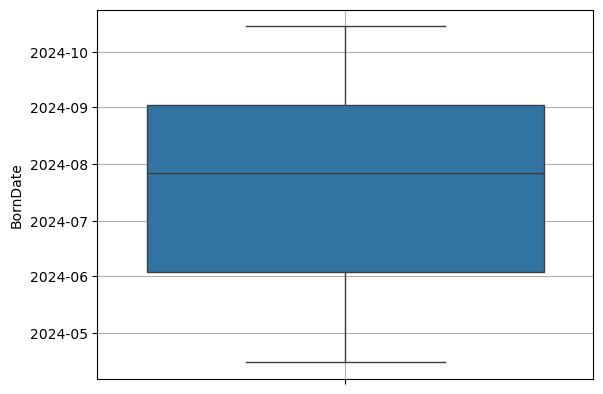

In [1290]:
sns.boxplot(data=data,y='BornDate')
plt.grid()

In [1204]:
data['TimeOfDay'].describe()

count         30773
unique            4
top       Afternoon
freq          10803
Name: TimeOfDay, dtype: object

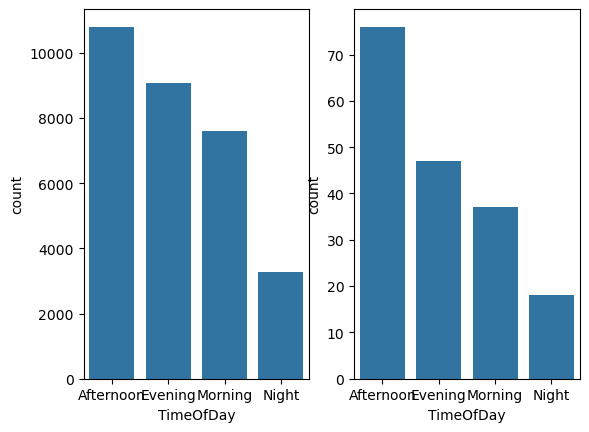

In [1291]:
plt.subplot(1,2,1)
sns.countplot(data=data,x='TimeOfDay')
plt.subplot(1,2,2)
sns.countplot(data=data[data['Converted']==1],x='TimeOfDay')
plt.show()

#### Converted leads TimeOfDay
Evening and Night time conversion rate seems less than Afternoon and Morning time

### DayOfWeek: leads originating around weekend has better conversion rate.

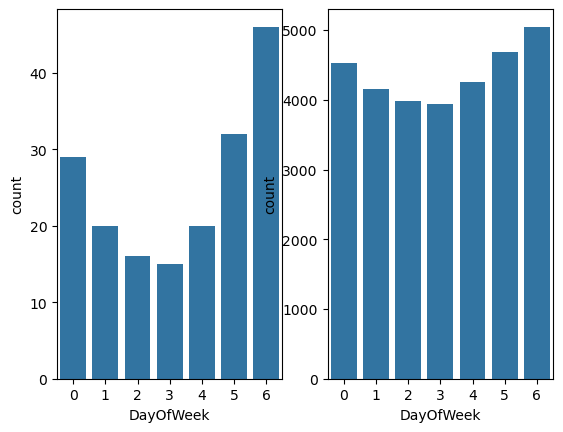

In [1292]:
plt.subplot(1,2,1)
sns.countplot(data=data[data['Converted']==1],x='DayOfWeek')
plt.subplot(1,2,2)
sns.countplot(data=data[data['Converted']==0],x='DayOfWeek')
plt.show()

### Converted and Project wise converted

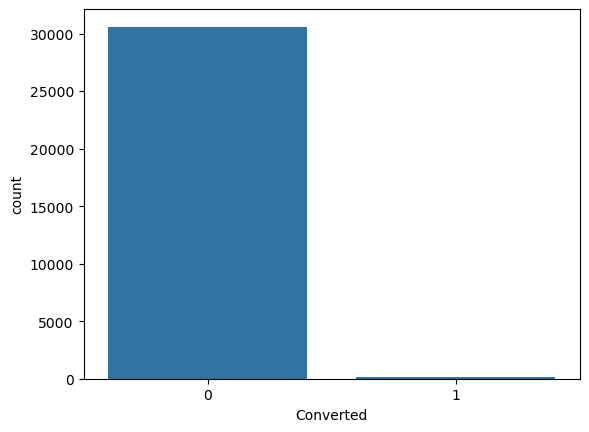

In [1207]:
sns.countplot(data=data,x='Converted')
plt.show()

In [1208]:
data[data['Converted']==0].shape[0], data[data['Converted']==1].shape[0]

(30595, 178)

only 178 leads got converted while 30595 did not.

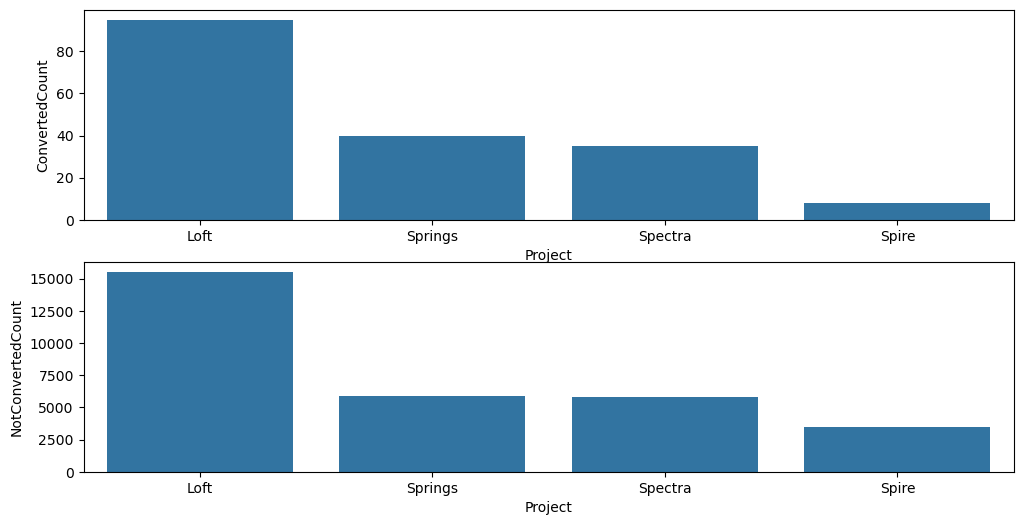

In [1209]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.countplot(data=data[data['Converted']==1],x='Project',order = data['Project'].value_counts().index)
plt.ylabel('ConvertedCount')
plt.subplot(2,1,2)
sns.countplot(data=data[data['Converted']==0],x='Project',order = data['Project'].value_counts().index)
plt.ylabel('NotConvertedCount')
plt.show()

#### Project wise conversion looks propotional except for Spire

### UTM-Source

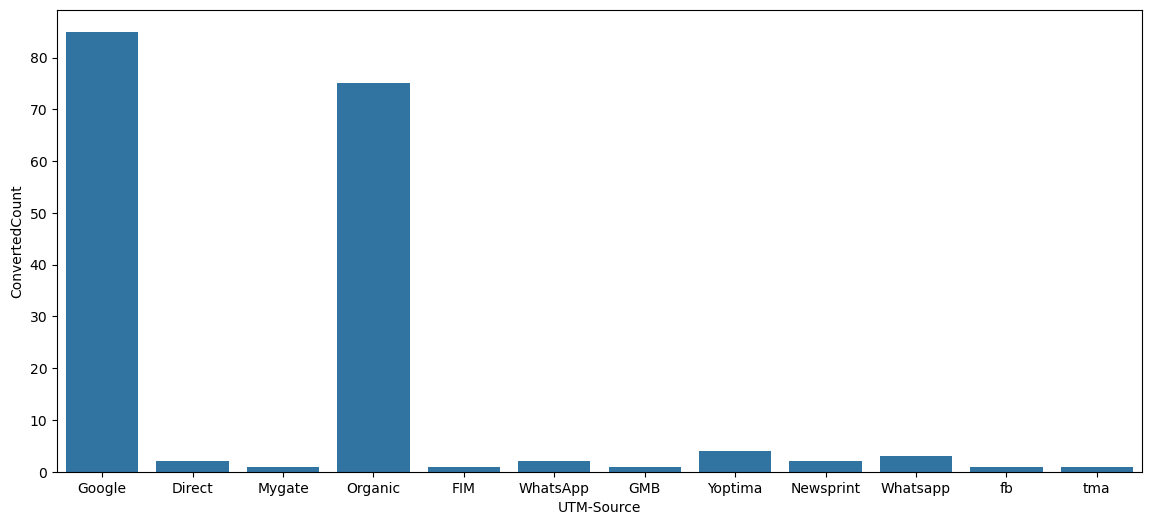

In [1210]:
plt.figure(figsize=(14,6))
sns.countplot(data=data[data['Converted']==1],x='UTM-Source')
plt.ylabel('ConvertedCount')
plt.show()

### Operating System

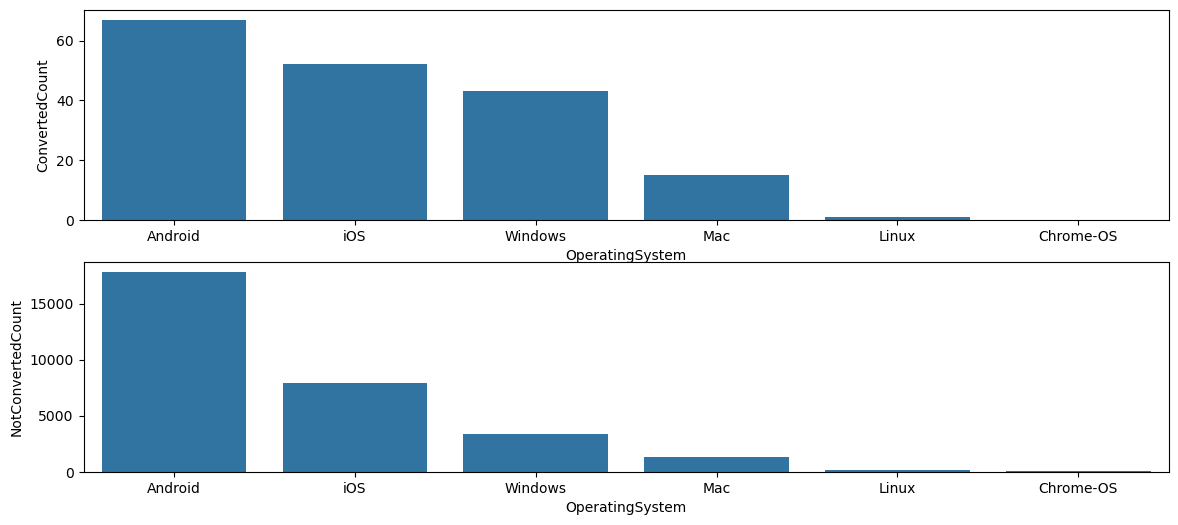

In [1212]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.countplot(data=data[data['Converted']==1],x='OperatingSystem', order = data['OperatingSystem'].value_counts().index)
plt.ylabel('ConvertedCount')

plt.subplot(2,1,2)
sns.countplot(data=data[data['Converted']==0],x='OperatingSystem', order = data['OperatingSystem'].value_counts().index)
plt.ylabel('NotConvertedCount')
plt.show()

#### Proportion of converted leads vary on basis of operating system.

In [1293]:
data.head()

,LeadId,VisitorId,BornDate,BornDateTime,Project,Stage,CountOfClickEvents,WebTimeSpent (seconds),UTM-Source,InstanceNumber,...,AMENITIES_TimeSpent,MediaTime,OperatingSystem,Country,State,City,MicroMarket,Converted,TimeOfDay,DayOfWeek
0,198611,Visitor-1003563,2024-05-30,2024-05-30 12:52:10,Springs,Not Interested,15,501.779,Google,6,...,0.0,0.00,Windows,India,Maharashtra,Mumbai,Andheri West,0,Afternoon,3
1,193927,Visitor-1006753,2024-05-10,2024-05-10 16:07:47,Spectra,Not Interested,5,54.175,GDN,2,...,0.0,0.00,Android,India,Telangana,Hyderabad,Habsiguda,0,Afternoon,4
2,230525,Visitor-1017271,2024-08-24,2024-08-24 19:42:04,Springs,Not Interested,18,292.363,GMB,17,...,0.0,0.00,Android,United Arab Emirates,دبي,دبي,زعبيل,0,Evening,5
3,208705,Visitor-1029567,2024-07-10,2024-07-10 12:36:38,Spectra,Not Interested,6,178.201,Google,6,...,0.0,0.00,Android,India,Chhattisgarh,Durg,Guru Nanak Nagar,0,Afternoon,2
4,253755,Visitor-1044910,2024-09-22,2024-09-22 14:30:57,Spectra,Not Interested,49,973.996,Google,4,...,0.0,10.05,Android,India,Telangana,Sangareddy,Vidya Nagar Colony,0,Afternoon,6


### CountOfClickEvents

In [1214]:
data[data['Converted']==0]['CountOfClickEvents'].describe()

count    30595.000000
mean        12.937506
std         20.995226
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max       1452.000000
Name: CountOfClickEvents, dtype: float64

In [1215]:
data[data['Converted']==1]['CountOfClickEvents'].describe()

count    178.000000
mean      21.994382
std       34.367817
min        0.000000
25%        7.000000
50%       12.000000
75%       23.750000
max      279.000000
Name: CountOfClickEvents, dtype: float64

<Axes: ylabel='CountOfClickEvents'>

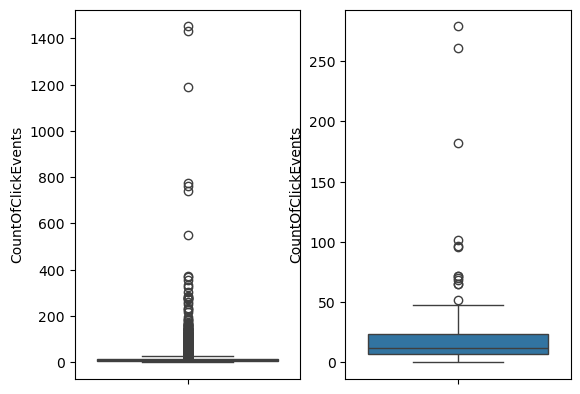

In [1294]:
plt.subplot(1,2,1)
sns.boxplot(data['CountOfClickEvents'])
plt.subplot(1,2,2)
sns.boxplot(data[data['Converted']==1]['CountOfClickEvents'])

### TimeSpent

#### Web TimeSpent

<Axes: xlabel='Converted', ylabel='WebTimeSpent (seconds)'>

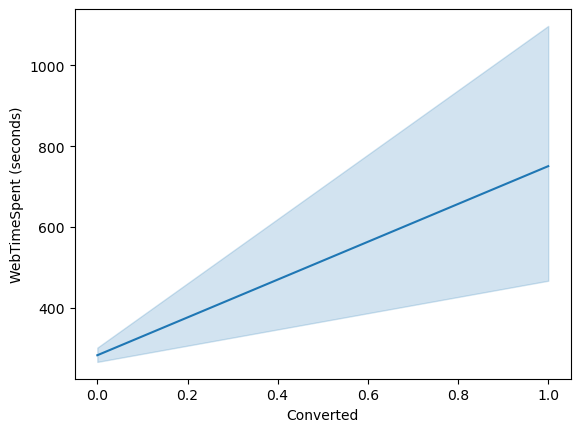

In [1295]:
sns.lineplot(data=data, x='Converted', y='WebTimeSpent (seconds)')


<Axes: ylabel='WebTimeSpent (seconds)'>

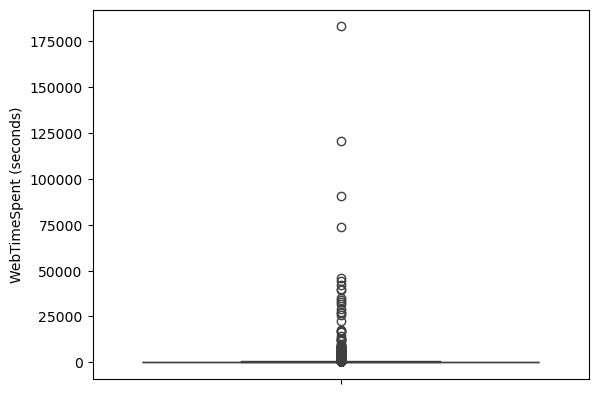

In [1296]:
sns.boxplot(data['WebTimeSpent (seconds)'])

In [1297]:
print(data[data['Converted']==1]['WebTimeSpent (seconds)'].describe())
print(data[data['Converted']==0]['WebTimeSpent (seconds)'].describe())

count      178.000000
mean       750.456000
std       2087.843881
min          6.399000
25%        151.554750
50%        271.293000
75%        520.304250
max      17130.687000
Name: WebTimeSpent (seconds), dtype: float64
count     30595.000000
mean        282.474635
std        1654.981120
min           0.000000
25%          93.912000
50%         159.491000
75%         281.332000
max      183142.689000
Name: WebTimeSpent (seconds), dtype: float64


### MediaTime

<Axes: xlabel='Converted', ylabel='MediaTime'>

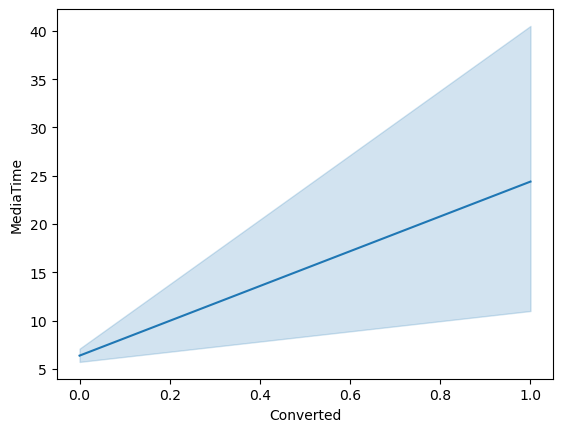

In [1298]:
sns.lineplot(data=data, x='Converted', y='MediaTime')

<Axes: ylabel='MediaTime'>

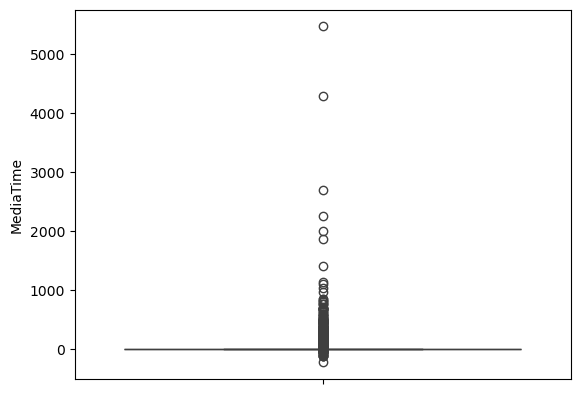

In [1299]:
sns.boxplot(data['MediaTime'])

In [1300]:
print(data[data['Converted']==1]['MediaTime'].describe())
print(data[data['Converted']==0]['MediaTime'].describe())

count    178.000000
mean      24.398764
std      101.844373
min       -7.220000
25%        0.000000
50%        0.000000
75%        0.000000
max      775.580000
Name: MediaTime, dtype: float64
count    30595.000000
mean         6.380424
std         61.128721
min       -217.500000
25%          0.000000
50%          0.000000
75%          0.000000
max       5474.330000
Name: MediaTime, dtype: float64


### TimeSpent Columns

In [1301]:
TimeSpentlist = ['HOME_TimeSpent','LOCATION_TimeSpent','MEDIA_TimeSpent','PLAN_TimeSpent','PRICE_TimeSpent','SPECIFICATIONS_TimeSpent','AMENITIES_TimeSpent']

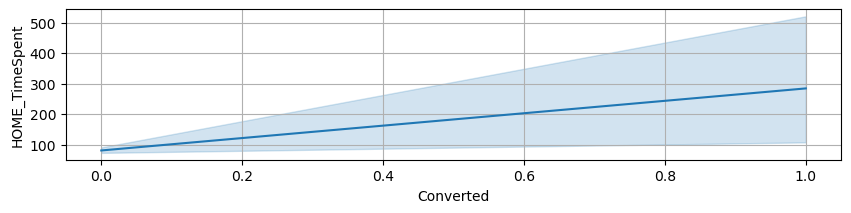

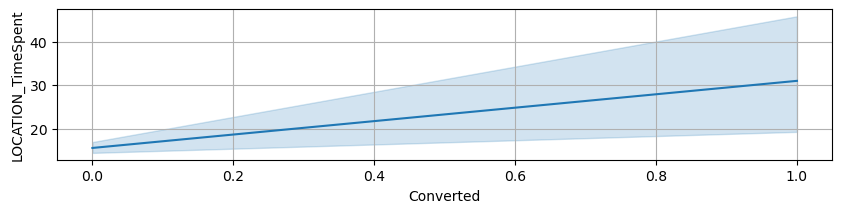

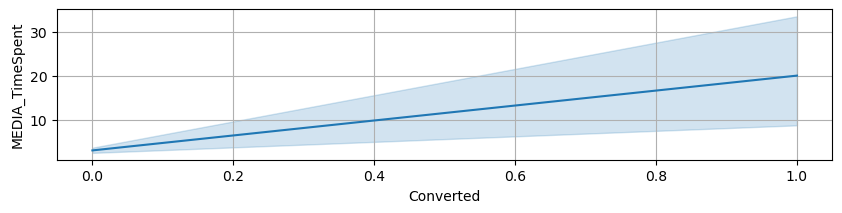

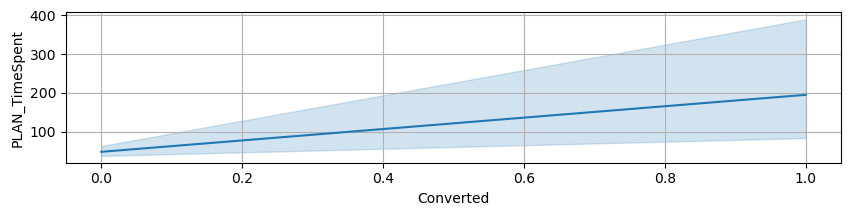

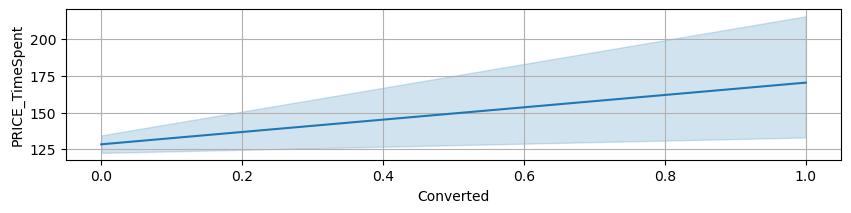

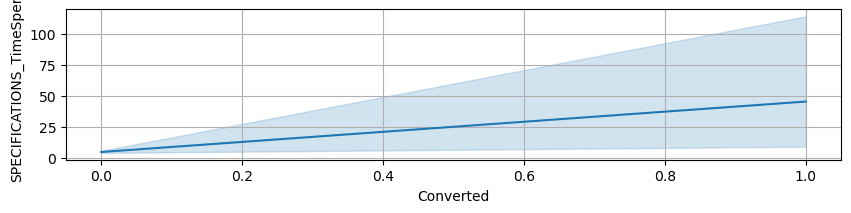

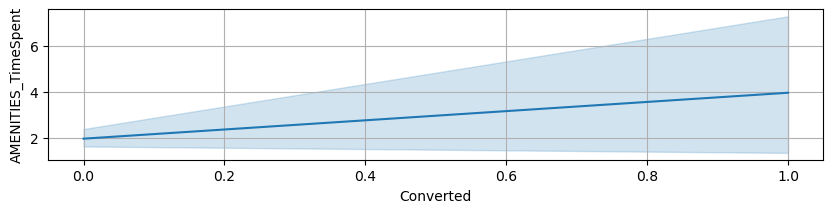

In [1302]:
for i,col in enumerate(TimeSpentlist,1):

    plt.figure(figsize=(10,16))
    
    plt.subplot(7,1,i)
    sns.lineplot(data=data, x='Converted', y=col)

    plt.grid()

    
    

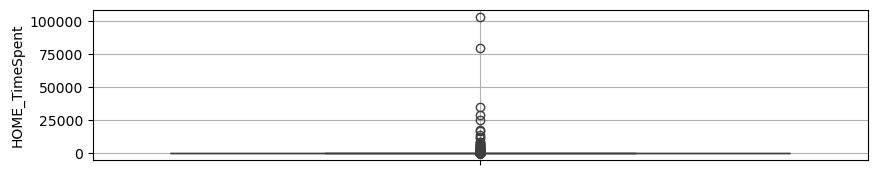

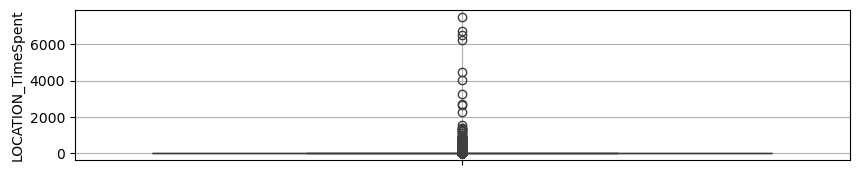

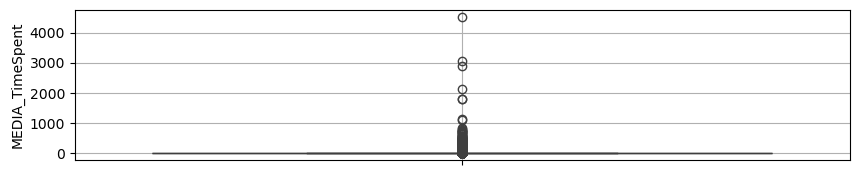

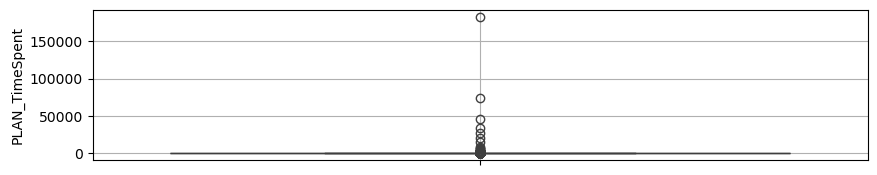

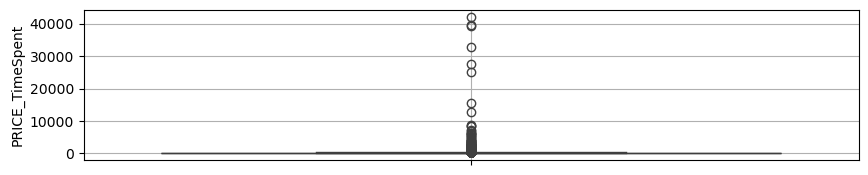

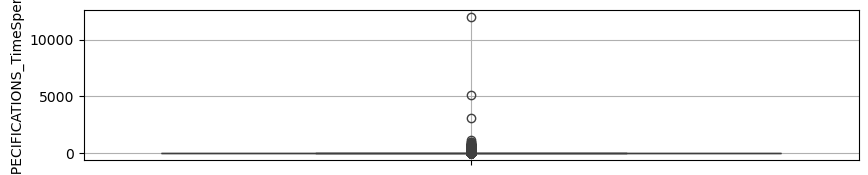

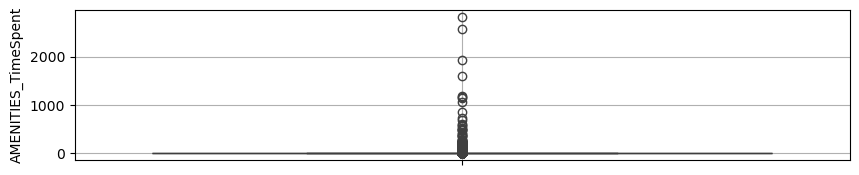

In [1303]:

for i,col in enumerate(TimeSpentlist,1):

    plt.figure(figsize=(10,16))
    
    plt.subplot(7,1,i)
    sns.boxplot(data[col])

    plt.grid()

    

In [1304]:
for i,col in enumerate(TimeSpentlist,1):
    print(data[data['Converted']==1][col].describe())
    print(data[data['Converted']==0][col].describe())

count      178.000000
mean       284.356247
std       1503.463317
min          0.000000
25%         19.104750
50%         57.870500
75%        144.843000
max      17130.687000
Name: HOME_TimeSpent, dtype: float64
count     30595.000000
mean         80.737560
std         832.477134
min           0.000000
25%          16.184000
50%          42.932000
75%          84.474500
max      103350.413000
Name: HOME_TimeSpent, dtype: float64
count    178.000000
mean      31.019152
std       90.886981
min        0.000000
25%        0.000000
50%        0.000000
75%       19.677250
max      847.621000
Name: LOCATION_TimeSpent, dtype: float64
count    30595.000000
mean        15.513607
std        105.986854
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7525.106000
Name: LOCATION_TimeSpent, dtype: float64
count    178.000000
mean      20.141517
std       86.573363
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max     

#### Time spent is higher for Converted leads

### Outlier Removal for Numerical Column

#### We will replace outlier for all Numerical column with Median

In [1305]:
numerical_features = ['CountOfClickEvents','MediaTime','WebTimeSpent (seconds)','HOME_TimeSpent','LOCATION_TimeSpent',
                         'MEDIA_TimeSpent','PRICE_TimeSpent','PLAN_TimeSpent','SPECIFICATIONS_TimeSpent','AMENITIES_TimeSpent']

In [1306]:
data['CountOfClickEvents'].describe()

count    30773.000000
mean        12.989894
std         21.107236
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max       1452.000000
Name: CountOfClickEvents, dtype: float64

In [1307]:
for cols in numerical_features:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    median = data[cols].quantile(0.50)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data[cols] = data[cols].apply(lambda x: x if lower<x<upper else (median+1))

    



In [1308]:

for i,col in enumerate(TimeSpentlist,1):
    print(data[data['Converted']==1][col].describe())
    print(data[data['Converted']==0][col].describe())

count    178.000000
mean      52.962073
std       44.666719
min        0.000000
25%       19.104750
50%       43.973000
75%       74.117000
max      179.784000
Name: HOME_TimeSpent, dtype: float64
count    30595.000000
mean        48.996561
std         42.520077
min          0.000000
25%         16.184000
50%         42.932000
75%         71.071500
max        187.367000
Name: HOME_TimeSpent, dtype: float64
count    178.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: LOCATION_TimeSpent, dtype: float64
count    30595.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: LOCATION_TimeSpent, dtype: float64
count    178.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: MEDIA_TimeSpent, dtype: float64
count    30595.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%      

## 2. Lead Scoring Logic Development 

In [1309]:
relevant_cat_features = ['TimeOfDay','Project','UTM-Source','OperatingSystem']

In [1310]:
relevant_num_features = ['CountOfClickEvents','WebTimeSpent (seconds)','HOME_TimeSpent','PRICE_TimeSpent','PLAN_TimeSpent']

In [1311]:
df = data[['TimeOfDay','Project','UTM-Source','OperatingSystem',
           'CountOfClickEvents','WebTimeSpent (seconds)','HOME_TimeSpent','PRICE_TimeSpent','Converted']]

In [1312]:
df

,TimeOfDay,Project,UTM-Source,OperatingSystem,CountOfClickEvents,WebTimeSpent (seconds),HOME_TimeSpent,PRICE_TimeSpent,Converted
0,Afternoon,Springs,Google,Windows,15.0,501.779,43.973,137.307,0
1,Afternoon,Spectra,GDN,Android,5.0,54.175,54.175,0.000,0
2,Evening,Springs,GMB,Android,18.0,292.363,136.144,58.243,0
3,Afternoon,Spectra,Google,Android,6.0,178.201,5.071,173.130,0
4,Afternoon,Spectra,Google,Android,10.0,160.877,162.434,89.821,0
...,...,...,...,...,...,...,...,...,...
30768,Afternoon,Spectra,Others,Android,24.0,160.877,43.973,91.859,0
30769,Morning,Spectra,Organic,Mac,10.0,160.877,43.973,91.240,0
30770,Evening,Spectra,sakshi,Android,5.0,219.587,32.212,187.375,0
30771,Morning,Springs,Google,Android,9.0,113.743,19.277,81.017,0


### 2.1 Updating typos for UTM-Source

In [1313]:
df.loc[df['UTM-Source']=='fb',['UTM-Source']]= 'Facebook'
df.loc[df['UTM-Source']=='whatsapp',['UTM-Source']]= 'WhatsApp'
df.loc[df['UTM-Source']=='Whatsapp',['UTM-Source']]= 'WhatsApp'
df.loc[df['UTM-Source']=='sakshi',['UTM-Source']]= 'Sakshi'
df.loc[df['UTM-Source']=='ig',['UTM-Source']]= 'IG'
df.loc[df['UTM-Source']=='google',['UTM-Source']]= 'Google'

In [1314]:
df['UTM-Source'].value_counts()

Google            19830
Organic            8536
Direct              853
FIM                 408
Yoptima             281
GMB                 204
IG                  171
WhatsApp            148
Newsprint           107
Mygate               74
Facebook             39
Blog                 32
Inshorts             31
LinkedIn             14
Adonmo               10
Eenadu                8
tma                   5
Youtube               5
Sakshi                4
ASBL                  3
GoogleAds             2
zoom                  2
PD                    2
TOI                   1
GDN                   1
Google_Organic        1
Others                1
Name: UTM-Source, dtype: int64

### Combining UTM-Source value less than 100 into one group 'OTHER'

In [1315]:
df['UTM-Source']=df['UTM-Source'].apply(lambda x: x if x in ['Newsprint','WhatsApp','IG','GMB','Yoptima','FIM','Direct','Organic','Google'] else 'OTHER')

In [1316]:
UTMSourceData = df.groupby('UTM-Source')['Converted'].mean()
OSData = df.groupby('OperatingSystem')['Converted'].mean()

In [1317]:
df.groupby('UTM-Source')['Converted'].mean()

UTM-Source
Direct       0.002345
FIM          0.002451
GMB          0.004902
Google       0.004286
IG           0.000000
Newsprint    0.018692
OTHER        0.012766
Organic      0.008786
WhatsApp     0.033784
Yoptima      0.014235
Name: Converted, dtype: float64

### 2.2 Changing Categorical features to Numerical

In [1318]:
df['UTM-Source'] = df.groupby('UTM-Source')['Converted'].transform('mean')

In [1319]:
df['OperatingSystem'] = df.groupby('OperatingSystem')['Converted'].transform('mean')

In [1320]:
df['TimeOfDay'] = df.groupby('TimeOfDay')['Converted'].transform('mean')

In [1321]:
df['Project'] = df.groupby('Project')['Converted'].transform('mean')

In [1322]:
df

,TimeOfDay,Project,UTM-Source,OperatingSystem,CountOfClickEvents,WebTimeSpent (seconds),HOME_TimeSpent,PRICE_TimeSpent,Converted
0,0.007035,0.006795,0.004286,0.012684,15.0,501.779,43.973,137.307,0
1,0.007035,0.006024,0.012766,0.003738,5.0,54.175,54.175,0.000,0
2,0.005179,0.006795,0.004902,0.003738,18.0,292.363,136.144,58.243,0
3,0.007035,0.006024,0.004286,0.003738,6.0,178.201,5.071,173.130,0
4,0.007035,0.006024,0.004286,0.003738,10.0,160.877,162.434,89.821,0
...,...,...,...,...,...,...,...,...,...
30768,0.007035,0.006024,0.012766,0.003738,24.0,160.877,43.973,91.859,0
30769,0.004858,0.006024,0.008786,0.011287,10.0,160.877,43.973,91.240,0
30770,0.005179,0.006024,0.012766,0.003738,5.0,219.587,32.212,187.375,0
30771,0.004858,0.006795,0.004286,0.003738,9.0,113.743,19.277,81.017,0


In [1323]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,TimeOfDay,Project,UTM-Source,OperatingSystem,CountOfClickEvents,WebTimeSpent (seconds),HOME_TimeSpent,PRICE_TimeSpent,Converted
0,1.000000,1.00000,0.126878,1.000000,0.60,0.888861,0.234689,0.334812,0.0
1,1.000000,0.82774,0.377872,0.294694,0.20,0.095967,0.289138,0.000000,0.0
2,0.147648,1.00000,0.145098,0.294694,0.72,0.517898,0.726617,0.142021,0.0
3,1.000000,0.82774,0.126878,0.294694,0.24,0.315669,0.027065,0.422163,0.0
4,1.000000,0.82774,0.126878,0.294694,0.40,0.284981,0.866930,0.219021,0.0
...,...,...,...,...,...,...,...,...,...
30768,1.000000,0.82774,0.377872,0.294694,0.96,0.284981,0.234689,0.223991,0.0
30769,0.000000,0.82774,0.260075,0.889810,0.40,0.284981,0.234689,0.222481,0.0
30770,0.147648,0.82774,0.377872,0.294694,0.20,0.388981,0.171919,0.456899,0.0
30771,0.000000,1.00000,0.126878,0.294694,0.36,0.201487,0.102884,0.197553,0.0


In [1325]:
df

,TimeOfDay,Project,UTM-Source,OperatingSystem,CountOfClickEvents,WebTimeSpent (seconds),HOME_TimeSpent,PRICE_TimeSpent,Converted
0,1.000000,1.00000,0.126878,1.000000,0.60,0.888861,0.234689,0.334812,0.0
1,1.000000,0.82774,0.377872,0.294694,0.20,0.095967,0.289138,0.000000,0.0
2,0.147648,1.00000,0.145098,0.294694,0.72,0.517898,0.726617,0.142021,0.0
3,1.000000,0.82774,0.126878,0.294694,0.24,0.315669,0.027065,0.422163,0.0
4,1.000000,0.82774,0.126878,0.294694,0.40,0.284981,0.866930,0.219021,0.0
...,...,...,...,...,...,...,...,...,...
30768,1.000000,0.82774,0.377872,0.294694,0.96,0.284981,0.234689,0.223991,0.0
30769,0.000000,0.82774,0.260075,0.889810,0.40,0.284981,0.234689,0.222481,0.0
30770,0.147648,0.82774,0.377872,0.294694,0.20,0.388981,0.171919,0.456899,0.0
30771,0.000000,1.00000,0.126878,0.294694,0.36,0.201487,0.102884,0.197553,0.0


### 2.3 Correlation

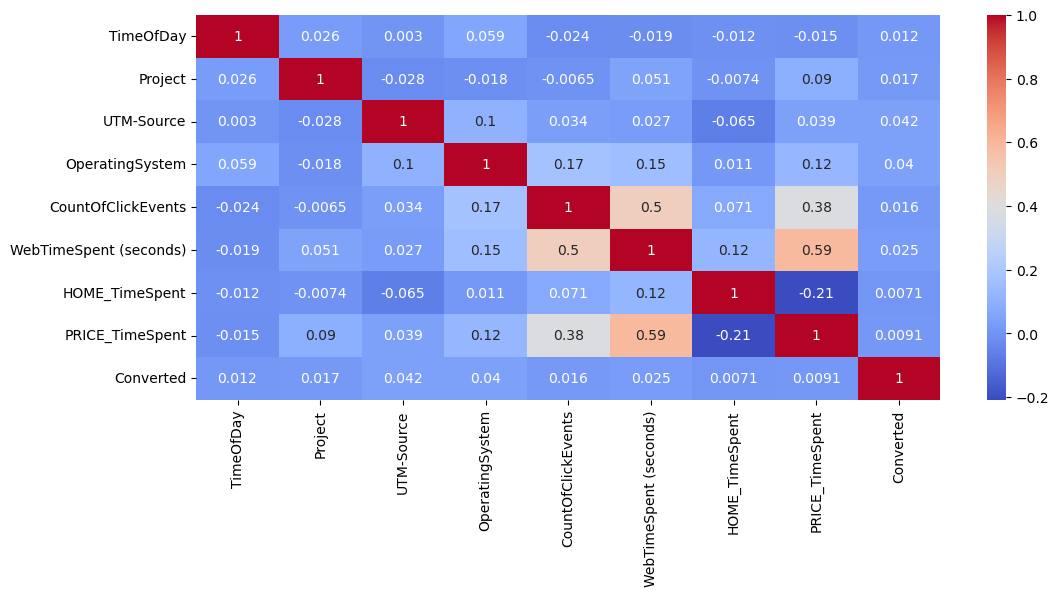

In [1326]:
Corr_mat = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(Corr_mat,annot=True, cmap='coolwarm')
plt.show()

In [1327]:
Corr_mat

,TimeOfDay,Project,UTM-Source,OperatingSystem,CountOfClickEvents,WebTimeSpent (seconds),HOME_TimeSpent,PRICE_TimeSpent,Converted
TimeOfDay,1.000000,0.025859,0.002958,0.058945,-0.024473,-0.019434,-0.011925,-0.014645,0.012363
Project,0.025859,1.000000,-0.028454,-0.018043,-0.006453,0.051090,-0.007402,0.089780,0.016642
UTM-Source,0.002958,-0.028454,1.000000,0.099837,0.033872,0.027249,-0.064661,0.039157,0.041671
OperatingSystem,0.058945,-0.018043,0.099837,1.000000,0.170968,0.152955,0.010871,0.123977,0.039932
CountOfClickEvents,-0.024473,-0.006453,0.033872,0.170968,1.000000,0.498820,0.071145,0.383174,0.016485
WebTimeSpent (seconds),-0.019434,0.051090,0.027249,0.152955,0.498820,1.000000,0.120612,0.588112,0.025205
HOME_TimeSpent,-0.011925,-0.007402,-0.064661,0.010871,0.071145,0.120612,1.000000,-0.208101,0.007070
PRICE_TimeSpent,-0.014645,0.089780,0.039157,0.123977,0.383174,0.588112,-0.208101,1.000000,0.009074
Converted,0.012363,0.016642,0.041671,0.039932,0.016485,0.025205,0.007070,0.009074,1.000000


In [1328]:
FeatureWeightage = Corr_mat['Converted'].apply(lambda x: round(x*1000))

In [1329]:
FeatureWeightage

TimeOfDay                   12
Project                     17
UTM-Source                  42
OperatingSystem             40
CountOfClickEvents          16
WebTimeSpent (seconds)      25
HOME_TimeSpent               7
PRICE_TimeSpent              9
Converted                 1000
Name: Converted, dtype: int64

#### Feature weightage also indicates the Highest value a feature can take. We will other values accordingly

#### Scoring example

In [1331]:
df['TimeOfDay'] * FeatureWeightage.loc['TimeOfDay'] / df['TimeOfDay'].max()

0        12.000000
1        12.000000
2         1.771778
3        12.000000
4        12.000000
           ...    
30768    12.000000
30769     0.000000
30770     1.771778
30771     0.000000
30772     3.491654
Name: TimeOfDay, Length: 30773, dtype: float64

### 2.4 Scoring Formula

In [1332]:
for cols in df.columns:
    maxval = df[cols].max()
    df[cols] = df[cols] * FeatureWeightage.loc[cols] /maxval
    

In [1333]:
df['LeadScore']= df.drop('Converted',axis=1).sum(axis=1)

In [1334]:
df[df['Converted']!=0]['LeadScore'].describe()

count    178.000000
mean      73.522380
std       16.960847
min       33.333265
25%       61.234337
50%       73.022760
75%       86.492508
max      113.188550
Name: LeadScore, dtype: float64

<Axes: xlabel='LeadScore', ylabel='Density'>

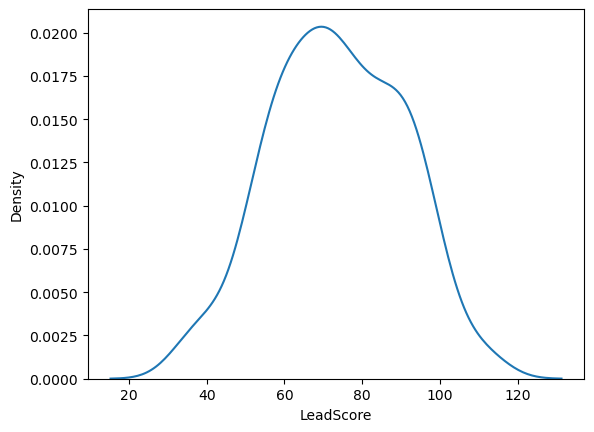

In [1335]:
sns.kdeplot(df[df['Converted']!=0]['LeadScore'])

In [1336]:
df[df['Converted']==0]['LeadScore'].describe()

count    30595.000000
mean        61.690940
std         16.632536
min         12.932862
25%         49.815181
50%         59.167177
75%         71.552618
max        135.314744
Name: LeadScore, dtype: float64

<Axes: xlabel='LeadScore', ylabel='Density'>

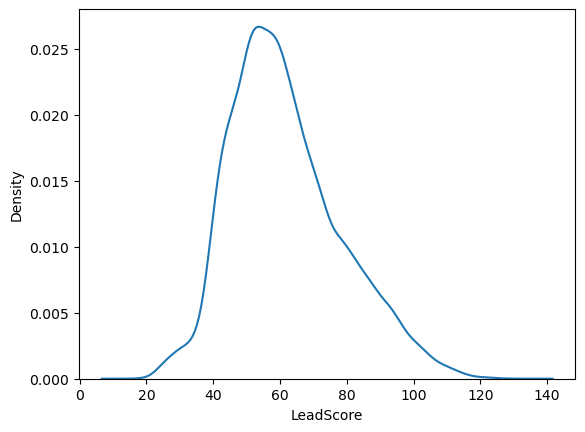

In [1337]:
sns.kdeplot(df[df['Converted']==0]['LeadScore'])

#### Since Lead score for converted leads and Not converted tend to be normal, we will do Z-test to find out accuracy of our lead score model

In [1338]:
LeadScoreForConvertedLeads = df[df['Converted']!=0]['LeadScore']
LeadScoreForNotConvertedLeads = df[df['Converted']==0]['LeadScore']

### 2.6 Effectiveness of Lead Score
Null Hypothesis: LeadScore for Converted Leads and Not Converted Leads is similar.
Alternate Hypothesis: LeadScore for Converted Leads and Not Converted Leads is not similar.

In [1339]:
from statsmodels.stats import weightstats as stests
from scipy import stats

z_score, pval = stests.ztest(x1 = LeadScoreForConvertedLeads, x2= LeadScoreForNotConvertedLeads, value = 0, alternative = 'two-sided')

In [1340]:
z_score, pval

(9.461928313794239, 3.0231579901423983e-21)

#### Since p-value is very small, we should with Alternate hypothesis i.e Calculated lead score is signifcantly higher for converted lead

### 2.7 Questions

#### 2.7.1 What factors significantly contribute to a higher lead score?

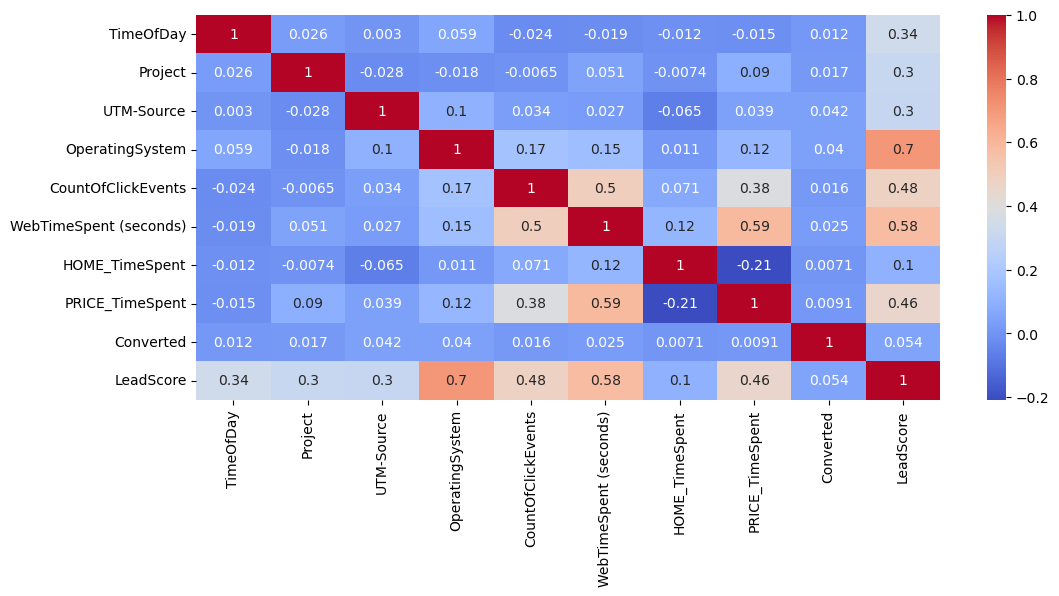

In [1341]:
Corr_mat = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(Corr_mat,annot=True, cmap='coolwarm')
plt.show()

Based on EDA it is detrmined that following are top 4 features which contribute to high lead score:

    
    OperatingSystem
    WebTimeSpent
    PriceTimeSpent
    CountOfClickEvents
    

#### 2.7.2 How will you test and validate the scoring model for effectiveness?

I used 2 sample z-test to validate scoring model in section 2.6.

## 3. Top Contributors/Features 

In [1342]:
FeatureWeightage.reset_index().sort_values(by='Converted',ascending=False)

,index,Converted
8,Converted,1000
2,UTM-Source,42
3,OperatingSystem,40
5,WebTimeSpent (seconds),25
1,Project,17
4,CountOfClickEvents,16
0,TimeOfDay,12
7,PRICE_TimeSpent,9
6,HOME_TimeSpent,7


### 3.1 Questions

#### 3.1.1 Which features (e.g., UTM-Source, CountOfClickEvents, WebTimeSpent) have the highest impact on successful conversions?

UTM-Source, OperatingSystem and WebTimeSpent have highest impact on coversion

### 3.1.2 How can these insights be used to prioritize leads and optimize efforts? 

#### UTM-Source: 

In [1343]:
UTMSourceData.reset_index().sort_values(by='Converted',ascending=False)

,UTM-Source,Converted
8,WhatsApp,0.033784
5,Newsprint,0.018692
9,Yoptima,0.014235
6,OTHER,0.012766
7,Organic,0.008786
2,GMB,0.004902
3,Google,0.004286
1,FIM,0.002451
0,Direct,0.002345
4,IG,0.000000



###### Above listed UTM source has good conversion rate. Focus should be to reach out to potential customers on these UTM-Source. More presence in these UTM-Source should yield better conversion rate. Whatsapp has best conversion. Organics traffics has a good conversion rate, awareness effort should be made to get more organic traffic.

### Operating System

In [1344]:
OSData.reset_index().sort_values(by='Converted',ascending=False)

,OperatingSystem,Converted
4,Windows,0.012684
3,Mac,0.011287
2,Linux,0.007937
5,iOS,0.006513
0,Android,0.003738
1,Chrome-OS,0.000000


##### Windows and Mac are PC based OS, which has better conversion rate. Focus should to be increase presence in PC based resources.

## 4. Differentiation Features for Positive and Negative Sale Results 

### 4.1 What are the common characteristics of leads that converted successfully compared to those that did not?
   #### 1. Time of Day: People whose leads originates in Morning and Afternoon has better rate of conversion.(Section EDA).
   #### 2. Leads that are interested in Project Spire has least conversion rate.(EDA Section).
   #### 3. Leads Originating from PC based OS has signficantly better conversion rate than Mobile based OS.
   #### 4  UTM-Source Whatsapp has best conversion rate while Social media sites like IG has less conversion rate.
   #### 5. Converted leads spends more time on web researching about project.
   #### 6. Leads originating on Monday, Saturday and Sunday has higher conversion rate than the weekdays.

### 4.2 Are there specific behavioral patterns that correlate with positive or negative outcomes?

#### 1. Leads originating early in day reflects serious interest of the Visitor.
#### 2. A Person who is seriously interested prefers to search on bigger screen e.g. PC/Laptop
#### 3. Source of lead which is personalised has better chance of converting. Whatsapp is personalised Social netwroking tool than IG/FB
#### 4. Higher the time spent reasearching about the project better are the chances of converting.
#### 5. People who are working and earning tend to search for properties on weekends, hence weekend leads has better converion rate. 

### 4.3. Can you propose any recommendations for improving lead conversion based on your findings?

#### 1. Create a presentable and detailed web presence.
#### 2. Reach out to potential customers through personalised channels.
#### 3. Spread awareness about Project through Events/ Sponsorships to generate Organic interests.
#### 4. Advertisement/ Social media marketing in morning and afternoon. 
#### 5. Get more advertisment space during the weekends.
#### 6. Internet advertisement should be more focussed on PC friendly web places.